(<AxesSubplot:>, <AxesSubplot:xlabel='intensity', ylabel='# pixels'>)

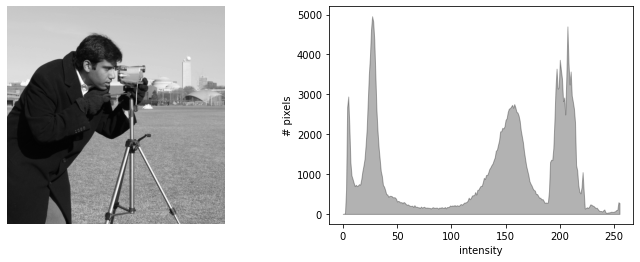

In [1]:
import skdemo
import matplotlib.pyplot as plt
from skimage import data, img_as_float, io

camera = data.camera()
skdemo.imshow_with_histogram(camera)

(<AxesSubplot:>, <AxesSubplot:xlabel='intensity', ylabel='# pixels'>)

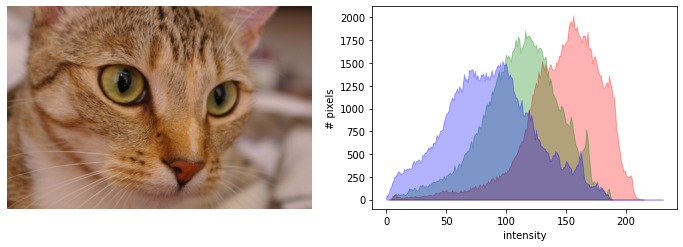

In [2]:
cat = data.chelsea()
skdemo.imshow_with_histogram(cat)

(<AxesSubplot:>, <AxesSubplot:xlabel='intensity', ylabel='# pixels'>)

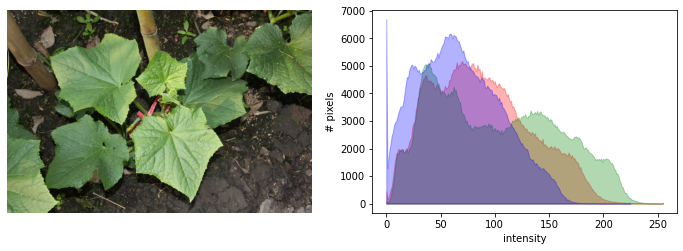

In [3]:
leaves = io.imread('leaves.jpg')
skdemo.imshow_with_histogram(leaves)

(<AxesSubplot:>, <AxesSubplot:xlabel='intensity', ylabel='# pixels'>)

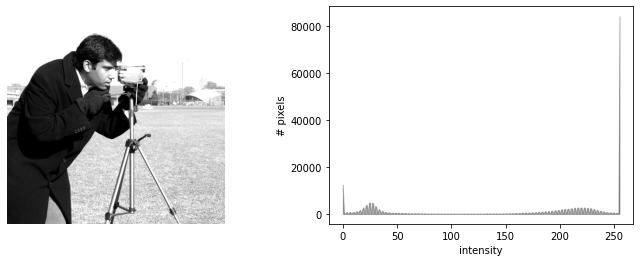

In [4]:
from skimage import exposure

high_contrast = exposure.rescale_intensity(camera, in_range=(10, 180))
skdemo.imshow_with_histogram(high_contrast)

(<AxesSubplot:>, <AxesSubplot:xlabel='intensity', ylabel='# pixels'>)

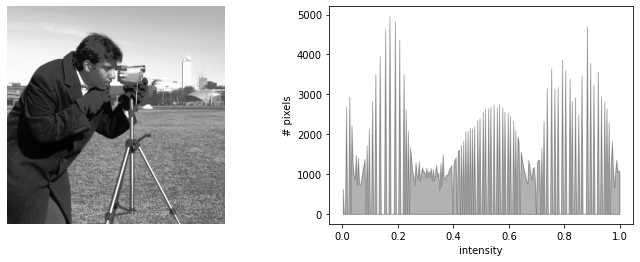

In [5]:
equalized = exposure.equalize_hist(camera)
skdemo.imshow_with_histogram(equalized)

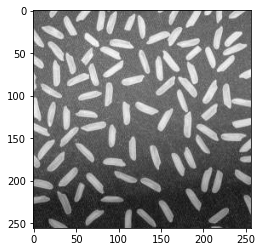

131


In [6]:
from skimage import filters

rice = io.imread('rice.jpg')
plt.imshow(rice)
plt.show()
otsu_thresh = filters.threshold_otsu(rice)
print(otsu_thresh)

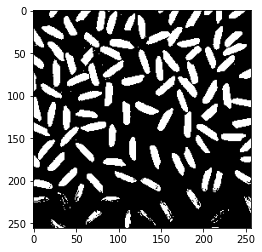

In [7]:
otsu_binary = rice > otsu_thresh
plt.imshow(otsu_binary, cmap='gray')
plt.show()

[[120.05628366 120.15753326 120.36069716 ... 135.2105398  134.72296929
  134.47530517]
 [120.11126885 120.21218672 120.41467195 ... 135.07791934 134.59399919
  134.3481969 ]
 [120.22304451 120.32331357 120.52447158 ... 134.8178346  134.34109974
  134.09896203]
 ...
 [ 74.24912411  74.34069678  74.52580643 ...  74.11219937  74.15014141
   74.16962326]
 [ 74.23050248  74.32354252  74.51161891 ...  73.98401934  74.01946948
   74.03767214]
 [ 74.22184584  74.31561967  74.50517995 ...  73.92051971  73.95473894
   73.97230958]]


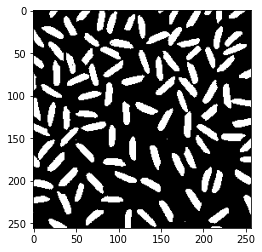

In [8]:
block_size = 55
local_thresh = filters.threshold_local(rice, block_size, offset=-20)
print(local_thresh)
local_binary = rice > local_thresh
plt.imshow(local_binary, cmap='gray')
plt.show()

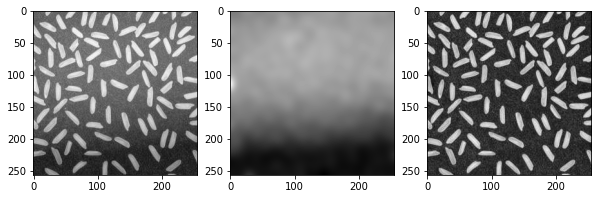

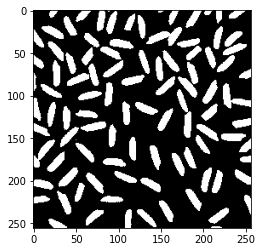

In [9]:
from skimage import morphology, img_as_float
img = img_as_float(rice)
bg = morphology.erosion(img, morphology.square(9))
bg = filters.gaussian(bg, sigma=7)
result = img - bg

plt.figure(figsize=(10,8))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(bg, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(result, cmap="gray")
plt.show()

front = result > 0.2
plt.imshow(front, cmap="gray")


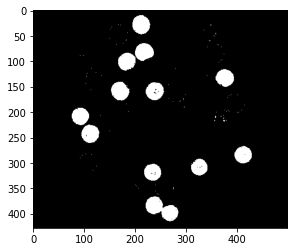

In [10]:
import numpy as np
from skimage.color import rgb2hsv

balloon = io.imread("mm.jpg")
width = balloon.shape[1]
height = balloon.shape[0]
img = np.zeros((height,width))

balloon_hsv = rgb2hsv(balloon)
img[np.logical_and(balloon_hsv[:, :, 0]>0.3, balloon_hsv[:, :, 0]<0.37)] = 255

plt.imshow(img)
plt.show()